In [4]:
import numpy as np
import math

In [21]:
x = np.array([1,2,3,4])
print(np.mean(x))
print(np.var(x))

2.5
1.25


In [25]:
y = np.array([1,2,3,4,math.nan])
print(np.nanmean(y))
print(np.nanvar(y,ddof=1))

2.5
1.6666666666666667


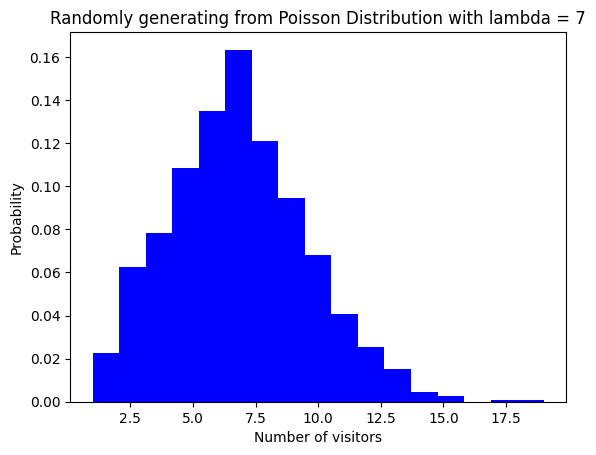

In [44]:
# Random Generation of 1000 independent Poisson samples
import numpy as np
lambda_ = 7
N = 1000
X = np.random.poisson(lambda_,N)

# Histogram of Poisson distribution
import matplotlib.pyplot as plt
plt.hist(X, 17, density = True, color = 'blue')
plt.title("Randomly generating from Poisson Distribution with lambda = 7")
plt.xlabel("Number of visitors")
plt.ylabel("Probability")
plt.show()

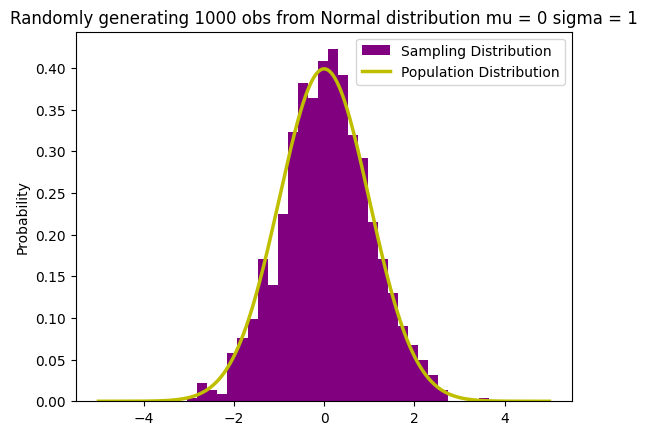

In [49]:
# Random Generation of 1000 independent Normal samples
import numpy as np
mu = 0
sigma = 1
N = 1000
X = np.random.normal(mu,sigma,N)

# Population distribution
from scipy.stats import norm
x_values = np.arange(-5,5,0.01)
y_values = norm.pdf(x_values)
#Sample histogram with Population distribution
import matplotlib.pyplot as plt
plt.hist(X, 30, density = True,color = 'purple',label = 'Sampling Distribution')
plt.plot(x_values,y_values, color = 'y',linewidth = 2.5,label = 'Population Distribution')
plt.title("Randomly generating 1000 obs from Normal distribution mu = 0 sigma = 1")
plt.ylabel("Probability")
plt.legend()
plt.show()

In [51]:
def runOLS(Y,X):

   # OLS esyimation Y = Xb + e --> beta_hat = (X'X)^-1(X'Y)
   beta_hat = np.dot(np.linalg.inv(np.dot(np.transpose(X), X)), np.dot(np.transpose(X), Y))

   # OLS prediction
   Y_hat = np.dot(X,beta_hat)
   residuals = Y-Y_hat
   RSS = np.sum(np.square(residuals))
   sigma_squared_hat = RSS/(N-2)
   TSS = np.sum(np.square(Y-np.repeat(Y.mean(),len(Y))))
   MSE = sigma_squared_hat
   RMSE = np.sqrt(MSE)
   R_squared = (TSS-RSS)/TSS

   # Standard error of estimates:square root of estimate's variance
   var_beta_hat = np.linalg.inv(np.dot(np.transpose(X),X))*sigma_squared_hat
   
   SE = []
   t_stats = []
   p_values = []
   CI_s = []
   
   for i in range(len(beta)):
        #standard errors
        SE_i = np.sqrt(var_beta_hat[i,i])
        SE.append(np.round(SE_i,3))

        #t-statistics
        t_stat = np.round(beta_hat[i,0]/SE_i,3)
        t_stats.append(t_stat)

        #p-value of t-stat p[|t_stat| >= t-treshhold two sided] 
        p_value = t.sf(np.abs(t_stat),N-2) * 2
        p_values.append(np.round(p_value,3))

        #Confidence intervals = beta_hat -+ margin_of_error
        t_critical = t.ppf(q =1-0.05/2, df = N-2)
        margin_of_error = t_critical*SE_i
        CI = [np.round(beta_hat[i,0]-margin_of_error,3), np.round(beta_hat[i,0]+margin_of_error,3)]
        CI_s.append(CI)
        return(beta_hat, SE, t_stats, p_values,CI_s, 
                MSE, RMSE, R_squared)